In [2]:
%load_ext zipline
%matplotlib inline

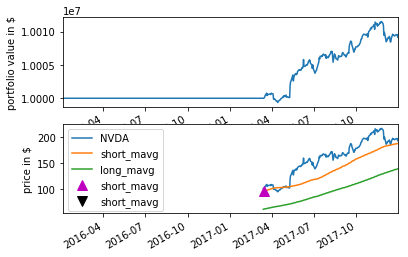

,NVDA,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.013979,NaN,NaN,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,1,[],0.0224
2016-01-05 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.012312,0.175904,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,2,[],0.0225
2016-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.024771,0.137796,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,3,[],0.0218
2016-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.048168,0.167837,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,4,[],0.0216
2016-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.058616,0.145620,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,5,[],0.0213
2016-01-11 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.057684,0.154994,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,6,[],0.0217
2016-01-12 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.050081,0.177568,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,7,[],0.0212
2016-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.073772,0.192027,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,8,[],0.0208
2016-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.058567,0.225892,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,9,[],0.0210
2016-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.078776,0.225682,0.000000,0.0,10000000.0,0.0,...,NaN,0,0,NaN,10000000.0,0.0,0.0,10,[],0.0203


In [7]:
%%zipline --start 2016-1-1 --end 2018-1-1 -o dma.pickle

from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('NVDA')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(NVDA=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['NVDA'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

In [6]:
%%zipline --start 2016-1-1 --end 2018-1-1

from zipline.api import order, order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.security = symbol('NVDA')
    
def handle_data(context, data):
    MA1 = data[context.security].mavg(50)
    MA2 = data[context.security].mavg(200)
    
    current_price = data[context.security].price
    current_positions = context.portfolio.positions[symbol('NVDA')].amount
    cash = context.portfolio.cash
    
    if (MA1 > MA2) and current_positions == 0:
        number_of_shares = int(cash / current_price)
        order(context.security, number_of_shares)
        
    elif (MA1 < MA2) and current_positions != 0:
        # set the number of shares hold to 0 == sell all shares!
        order_target(context.security, 0)
        
    record(MA1 = MA1, MA2 = MA2, Price = current_price)

,MA1,MA2,Price,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,31.23964,24.291075,32.369,NaN,0.000000,NaN,-0.013979,NaN,NaN,0.000000e+00,...,0,0,0,NaN,1.000000e+07,0.00,0.00,1,[],0.0224
2016-01-05 21:00:00+00:00,31.33158,24.339635,32.890,0.003287,-0.000293,-0.065823,-0.012312,0.175904,-0.018685,-1.008108e+07,...,0,0,0,-11.224972,1.000000e+07,0.00,0.00,2,"[{'amount': 306420, 'price': 32.89205562030404...",0.0225
2016-01-06 21:00:00+00:00,31.39254,24.385150,31.530,0.380735,-0.041968,-1.070940,-0.024771,0.137796,1.173817,-7.937989e+04,...,0,0,0,-9.229298,-8.108183e+04,10078153.80,10078153.80,3,"[{'amount': 2517, 'price': 31.53000015828953, ...",0.0218
2016-01-07 21:00:00+00:00,31.43110,24.425945,30.280,0.374522,-0.080585,-0.714807,-0.048168,0.167837,1.450953,0.000000e+00,...,0,0,0,-11.263321,-1.604617e+05,9740783.61,9740783.61,4,[],0.0216
2016-01-08 21:00:00+00:00,31.45706,24.470205,29.630,0.324471,-0.100666,-0.897459,-0.058616,0.145620,1.441831,0.000000e+00,...,0,0,0,-11.929974,-1.604617e+05,9354612.36,9354612.36,5,[],0.0213
2016-01-11 21:00:00+00:00,31.47942,24.515085,29.680,0.324915,-0.099121,-0.519815,-0.057684,0.154994,1.529127,0.000000e+00,...,0,0,0,-10.710891,-1.604617e+05,9153803.31,9153803.31,6,[],0.0217
2016-01-12 21:00:00+00:00,31.53152,24.560415,30.180,0.360721,-0.083674,-0.015798,-0.050081,0.177568,1.669424,0.000000e+00,...,0,0,0,-8.256106,-1.604617e+05,9169250.16,9169250.16,7,[],0.0212
2016-01-13 21:00:00+00:00,31.55146,24.600705,29.260,0.350297,-0.112097,-0.064324,-0.073772,0.192027,1.508082,0.000000e+00,...,0,0,0,-9.418236,-1.604617e+05,9323718.66,9323718.66,8,[],0.0208
2016-01-14 21:00:00+00:00,31.55304,24.640735,28.670,0.329204,-0.130324,-2.387887,-0.058567,0.225892,0.868447,0.000000e+00,...,0,0,0,-10.016878,-1.604617e+05,9039496.62,9039496.62,9,[],0.0210
2016-01-15 21:00:00+00:00,31.52740,24.672545,27.110,0.370254,-0.178518,-2.666758,-0.078776,0.225682,1.069333,0.000000e+00,...,0,0,0,-10.595700,-1.604617e+05,8857223.79,8857223.79,10,[],0.0203
